## Task 1 :
### *Unsupervised Metric Learning - PCA*
### *Apply the PCA method to diabetes data-set and evaluate the results.*

In [1]:
#importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

##### The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.  The dataset has 8 features 'Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age' and based on the diagnostic measurements the label is 1 for diabtic and 0 for not-diabetic.

In [2]:
#importing the “Pima Indians Diabetes Database” from https://github.com/surabhim/Diabetes

data = pd.read_csv('/Users/satwantkaur/Desktop/ML_Praxiseminar/Diabetes_dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Number of diabetic and non-diabetic observations in the data
Zero - Non Diabetic , one - Diabetic
0    500
1    267
dtype: int64


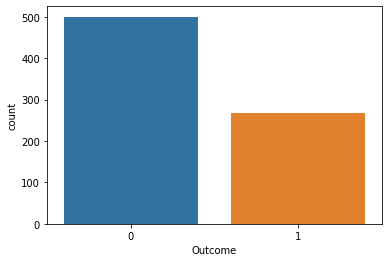

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

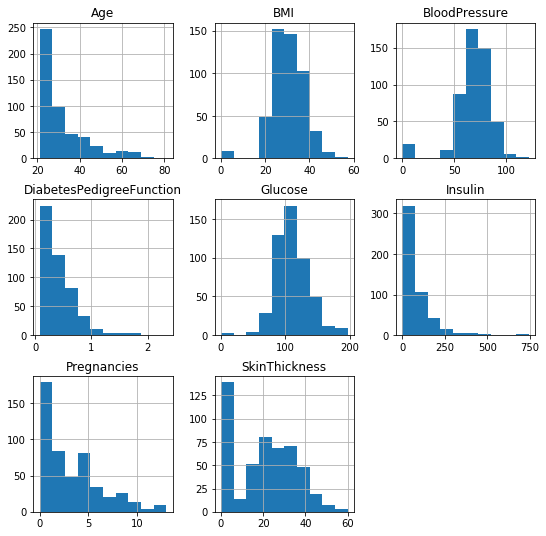

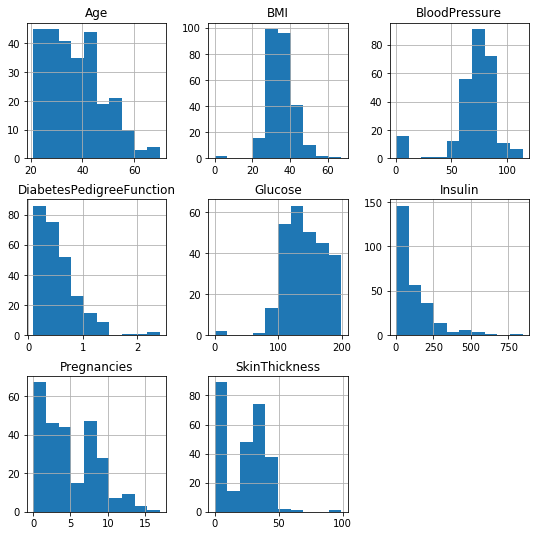

In [3]:
#visualing the dataset grouped by the outcome 1 = having diabetes or 0 = no diabetes.
print('Number of diabetic and non-diabetic observations in the data')
print('Zero - Non Diabetic , one - Diabetic')

print(pd.value_counts(data['Outcome'].values))

sns.countplot(x = 'Outcome',data = data)
plt.show()
data.groupby('Outcome').hist(figsize=(9, 9))

#### The data is not balanced, diabetic being 257 and no-diabetic obseravtions being 500. The data is not very well distributed for the age group. The level of glucose in patients wiuth no diabetes is uniformly distributed as compared to patients with diabetes and the level of insulin in some of the patients with diabetes is very low.

In [4]:
# The data has 0 values in 'Glucose,BloodPressure, SkinThickness, Insulin,BMI. Marking zero values as missing or NaN
data.iloc[:,1:6] = data.iloc[:,1:6].replace(0, np.NaN)
# # Replace np.nan with median value. 
imputer = Imputer(missing_values = np.NAN, strategy = 'median', axis = 0)
imputer = imputer.fit(data.iloc[:,1:6])
data.iloc[:,1:6] = imputer.transform(data.iloc[:,1:6])
data.shape

(767, 9)

In [5]:
#separating feature data from labels.
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[data.columns[:8]]
y = data['Outcome']

In [6]:
# Feature Scaling
sc = StandardScaler()
# Applying PCA by taking in all componenets to get a claer idea of the important features
pca = PCA(n_components = 8)
prin_components = pca.fit_transform(X)
principalDataframe = pd.DataFrame(data = prin_components, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print(percent_variance)

[86.85  8.71  1.98  1.2   0.9   0.28  0.09  0.  ]


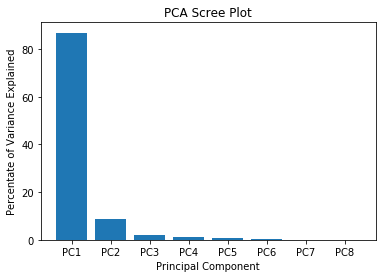

In [7]:
#plotting scree plot
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8']
plt.bar(x= range(1,9), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

####  Could not find the corelation circle equivalent in python so havent done that.

In [8]:
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features
X = data[data.columns[:8]]
y = data['Outcome']
classifier = RandomForestClassifier()
# X = sc.fit_transform(X)
classifier.fit(X,y)
#looking at variable importance values
pd.Series(classifier.feature_importances_,index = X.columns).sort_values(ascending = False)
# kfold = KFold(n_splits=10, random_state=10)
# rfecv = RFECV(estimator=classifier,  cv=kfold, scoring='accuracy')
# rfecv.fit(X, y)

Glucose                     0.209418
BMI                         0.174631
Age                         0.159079
Insulin                     0.122456
DiabetesPedigreeFunction    0.119026
SkinThickness               0.077227
BloodPressure               0.075531
Pregnancies                 0.062633
dtype: float64

#### Glucose, Age, BMI and DiabetesPedigreeFunction seem to the most important factors contributing to the diabetic conditinon of the patient.

In [10]:
# Calculate accuracy scores with the new feature set
new_features = ['Glucose', 'BMI','DiabetesPedigreeFunction','Age']
X_new = data[new_features]
pca = PCA(n_components = 2)
X_new = sc.fit_transform(X_new)
projected = pca.fit_transform(X_new)
kfold = KFold(n_splits=10, random_state=10)
initial_score = cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(classifier, X_new, y, cv=kfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))
print(X_new.shape)

Initial accuracy : 0.7458646616541353 
Accuracy after Feature Selection : 0.7405502392344497 
(767, 4)


### Task 2: Supervised Metric Learning
#### Perform 3 supervised metric learning methods on your data-set. Evaluate your result using 5-fold cross validation and report mean accuracy for the classification results.

In [11]:
# Three supervised metric learning techniques- Linear Discriminant Analysis, K Neighbors Classifier and SVC.
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC(gamma='auto')))

names = []
scores = []
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
for name, model in models:
    X_r = model.fit(X_train, y_train)
    print(X_r)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
names

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
  Name     Score
0  KNN  0.766234
1  LDA  0.766234
2  SVC  0.779221


['KNN', 'LDA', 'SVC']

In [12]:
# using 5-fold cross validation
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    scores.append(score)
    names.append(name)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.718428
1  LDA  0.771946
2  SVC  0.651982


#### LDA seems to the best performer among the various supervised metric learning classifiers that were selected.

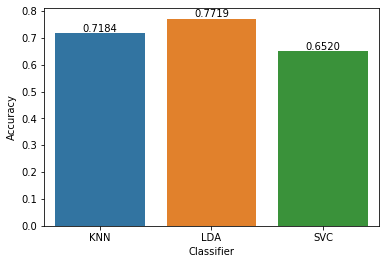

In [13]:
#Comparing accuracy of the 3 supervised learning classifiers
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

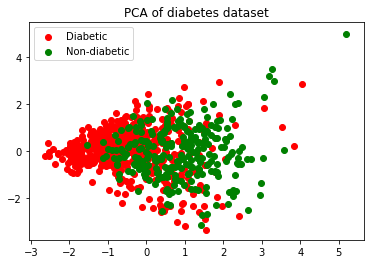

In [14]:
#2D visualisation of the PCA with selected features
colors = ['navy', 'turquoise', 'darkorange']
data_uniq = data.groupby('Outcome').head(1)
target_names ={'Diabetic': data_uniq['Outcome'][0], 'Non-diabetic':data_uniq['Outcome'][1]}
plt.figure()
for c, i, target_name in zip("rgb", [0, 1], target_names.keys()):
   plt.scatter(projected[y==i,0], projected[y==i,1], c=c,label=target_name)
plt.legend()
plt.title('PCA of diabetes dataset')

plt.show()